/var/folders/yj/6cwm4qyj6qz3dkx7t8z3qxc40000gn/T/ipykernel_90291/3157932227.py:21: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(rpm, torque, degree)


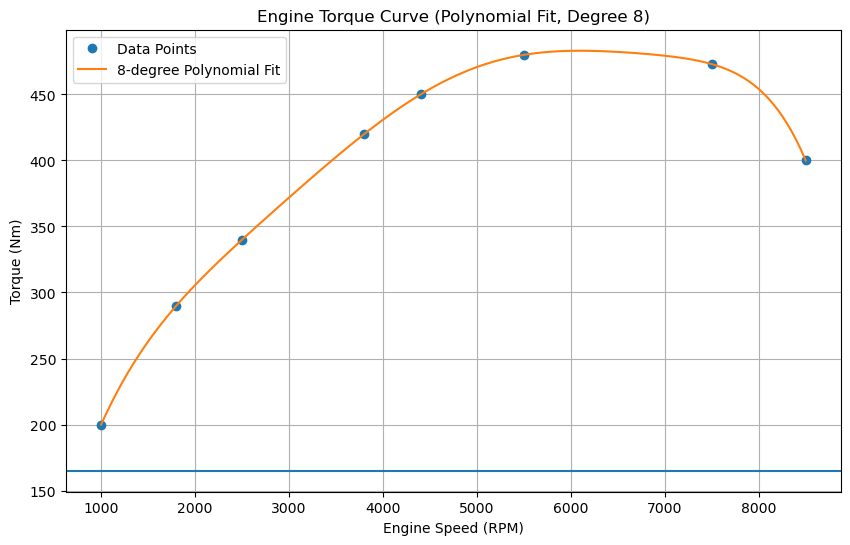

Coefficients of the fitted polynomial:
[-7.06550035e-29 -2.42739314e-24  6.00133059e-20 -4.10405939e-17
 -6.55483290e-12  5.71924357e-08 -2.10714248e-04  4.33510528e-01
 -7.34503572e+01]
coefficient_0: -73.45035722916211,
coefficient_1: 0.43351052800415885,
coefficient_2: -0.00021071424819866678,
coefficient_3: 5.719243565595494e-08,
coefficient_4: -6.5548328961878855e-12,
coefficient_5: -4.1040593868932394e-17,
coefficient_6: 6.001330591690171e-20,
coefficient_7: -2.4273931418243024e-24,
coefficient_8: -7.06550035040068e-29,


In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Given data points
points = np.array([
    [1000, 200],
    [1800, 290],
    [2500, 340],
    [3800, 420],
    [4400, 450],
    [5500, 480],
    [7500, 473],
    [8500, 400],
])
maxTq = 165
rpm = points[:, 0]
torque = points[:, 1]

# Fit a 7th-degree polynomial to the data
degree = 8
coefficients = np.polyfit(rpm, torque, degree)

# Create the polynomial function using the coefficients
polynomial = np.poly1d(coefficients)

# Generate smooth RPM values for plotting the polynomial
rpm_smooth = np.linspace(rpm.min(), rpm.max(), 500)
torque_smooth = polynomial(rpm_smooth)

# Plot the data and the fitted polynomial curve
plt.figure(figsize=(10, 6))
plt.plot(rpm, torque, 'o', label="Data Points")
plt.plot(rpm_smooth, torque_smooth, '-', label=f"{degree}-degree Polynomial Fit")
plt.axhline(maxTq)  # Assuming the maximum torque is the maximum value in the dataset
plt.xlabel("Engine Speed (RPM)")
plt.ylabel("Torque (Nm)")
plt.title(f"Engine Torque Curve (Polynomial Fit, Degree {degree})")
plt.legend()
plt.grid(True)
plt.show()

# Print the polynomial coefficients
print("Coefficients of the fitted polynomial:")
print(coefficients)

for i in range(len(coefficients)):
    print(f"coefficient_{i}: {coefficients[len(coefficients)-i-1]},")
